In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from yahoo_fin.stock_info import get_data  

In [3]:
#getting TODAY's date
today = datetime.strftime(datetime.today(), "%m%d%y")

In [4]:
#example of getting close prices for btc in weekly interval
btc = get_data('btc-usd', start_date='091714', end_date=today, index_as_date=True, interval='1wk')['close']

In [5]:
btc

2014-09-15      398.821014
2014-09-22      377.181000
2014-09-29      320.510010
2014-10-06      378.549011
2014-10-13      389.545990
                  ...     
2022-08-29    19986.712891
2022-09-05    21769.255859
2022-09-12    19419.505859
2022-09-19    18802.097656
2022-09-26    19133.074219
Name: close, Length: 420, dtype: float64

In [8]:
#defining function to read data from a given url
def getdata(url):
    r = requests.get(url,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
    data = pd.read_html(r.text)
    return data

In [9]:
# defining function to get top 500 cryptos by marketcap off yahoo finance
def crypto_meta_marketcap(n_count=500):
    home = 'https://finance.yahoo.com/cryptocurrencies/'
    count = 100
    n_offset = n_count//count
    
    cryptos = None
    for o in range(n_offset):
        url = f'{home}?offset={o*100}&count={count}'
        df = getdata(url)[0]
        if cryptos is None:
            cryptos = pd.DataFrame(index=range(n_count), columns=df.columns)
        # print(cryptos, cryptos.loc[o*count:(o+1)*count], df, df.values)
        # print(len(cryptos), len(df.values))
        cryptos.iloc[o*count:(o+1)*count] = df
        
    return cryptos

In [11]:
#return a df of those top 500 cryptos
c = crypto_meta_marketcap()
c

,Select AllSymbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,Day Chart
0,Select BTC-USDBTC-USD,Bitcoin USD,19130.46,320.38,+1.70%,366.569B,44.019B,44.019B,44.019B,19.162M,NaN,NaN
1,Select ETH-USDETH-USD,Ethereum USD,1327.81,33.07,+2.55%,162.71B,16.049B,16.049B,16.049B,122.54M,NaN,NaN
2,Select USDT-USDUSDT-USD,Tether USD,0.999984,-0.00006,-0.01%,67.955B,57.716B,57.716B,57.716B,67.956B,NaN,NaN
3,Select USDC-USDUSDC-USD,USD Coin USD,1.0,0.0001,+0.01%,49.362B,4.001B,4.001B,4.001B,49.361B,NaN,NaN
4,Select BNB-USDBNB-USD,BNB USD,274.86,1.36,+0.50%,44.346B,724.456M,724.456M,724.456M,161.337M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Select XMON-USDXMON-USD,XMON USD,17873.31,974.29,+5.77%,26.719M,922167,922167,922167,1494,NaN,NaN
496,Select AE-USDAE-USD,Æternity USD,0.076214,0.000042,+0.05%,26.709M,1.075M,1.075M,1.075M,350.442M,NaN,NaN
497,Select CULT-USDCULT-USD,Cult DAO USD,0.000006,-0.0,-1.59%,26.637M,1.517M,1.517M,1.517M,4.319T,NaN,NaN
498,Select SERO-USDSERO-USD,Super Zero Protocol USD,0.072081,-0.001397,-1.90%,26.612M,753755,753755,753755,369.192M,NaN,NaN


In [6]:
# get their date of inception by seeing when their first price entry was. Note that this is moreso the first time
# yahoo fin has data for them, but for the purposes of the analysis it doesn't matter
inception = [get_data(symbol, start_date='091714', end_date=today, index_as_date=True, interval='1wk').index[0] for symbol in c['Symbol']]
c['inception'] = inception
c[['Symbol', 'inception']]

,Symbol,inception
0,BTC-USD,2014-09-15
1,ETH-USD,2017-11-06
2,USDT-USD,2017-11-06
3,USDC-USD,2018-10-08
4,BNB-USD,2017-11-06
...,...,...
495,ATOLO-USD,2021-11-29
496,UPP-USD,2018-06-18
497,CULT-USD,2022-01-31
498,PIVX-USD,2017-11-06


In [8]:
# seeing how old cryptos are in order to determine our analysis epoch time (in years)
c['age'] = ((datetime.today() - c['inception']).dt.days)/365

(array([ 3.,  7.,  6., 12., 14., 19., 16., 16., 20., 25., 14., 33., 31.,
        22., 14., 10.,  7., 11.,  9., 16., 20., 11., 10.,  8., 11.,  7.,
        14.,  5., 16., 14., 76.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.02191781, 0.18186301, 0.34180822, 0.50175342, 0.66169863,
        0.82164384, 0.98158904, 1.14153425, 1.30147945, 1.46142466,
        1.62136986, 1.78131507, 1.94126027, 2.10120548, 2.26115068,
        2.42109589, 2.5810411 , 2.7409863 , 2.90093151, 3.06087671,
        3.22082192, 3.38076712, 3.54071233, 3.70065753, 3.86060274,
        4.02054795, 4.18049315, 4.34043836, 4.50038356, 4.66032877,
        4.82027397, 4.98021918, 5.14016438, 5.30010959, 5.46005479,
        5.62      , 5.77994521, 5.93989041, 6.09983562, 6.25978082,
        6.41972603, 6.57967123, 6.73961644, 6.89956164, 7.05950685,
        7.21945205, 7.37939726, 7.53934247, 7.69928767, 7.85923288,
        8.01917808]),
 <BarContainer

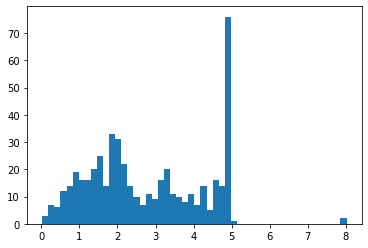

In [10]:
# plotting ages to determine decent value of epoch time
plt.hist(c['age'].array, bins=50)

In [9]:
# From the graph we see that we can get a good amount of cryptos that are "older" than 4 years, take these
years = 4
x = c[c['age'] > years]['Symbol'].reset_index(drop=True)
x.array

<PandasArray>
[ 'BTC-USD',  'ETH-USD', 'USDT-USD',  'BNB-USD',  'XRP-USD',  'ADA-USD',
 'DOGE-USD',  'TRX-USD',  'ETC-USD',  'LTC-USD',
 ...
  'BTS-USD',  'ELA-USD',  'BCD-USD', 'MONA-USD',  'SBD-USD',  'AOG-USD',
  'PRE-USD',  'UPP-USD', 'PIVX-USD',  'BLZ-USD']
Length: 137, dtype: object

In [10]:
# make function to give you a dictionary with symbol and close prices for each crypto
def analysisdata(symbols):
    series = dict()
    for i in symbols.array:
        series[i] = get_data(i, start_date='091718', end_date=today, index_as_date=True, interval='1wk')['close']
    return series

In [11]:
y = analysisdata(x)

In [12]:
# turn dictionary into a DataFrame
yy = pd.DataFrame.from_dict(y)
print(yy)

                 BTC-USD      ETH-USD  USDT-USD     BNB-USD   XRP-USD  \
2018-09-17   6710.629883   244.330002  0.999512   10.280600  0.570689   
2018-09-24   6625.560059   232.848007  1.000360   10.017800  0.581572   
2018-10-01   6602.950195   226.119003  0.996617   10.519000  0.482039   
2018-10-08   6290.930176   195.714996  0.989570    9.496740  0.403286   
2018-10-15   6482.350098   205.141998  0.983548    9.743300  0.456694   
...                  ...          ...       ...         ...       ...   
2022-08-22  19616.814453  1430.547363  1.000028  276.250885  0.323095   
2022-08-29  19986.712891  1577.641602  1.000061  278.841858  0.331799   
2022-09-05  21769.255859  1761.800049  1.000276  295.161865  0.355119   
2022-09-12  19419.505859  1335.329102  1.000023  266.313171  0.358323   
2022-09-19  18890.789062  1324.388184  1.000060  266.369598  0.415183   

             ADA-USD  DOGE-USD   TRX-USD    ETC-USD    LTC-USD  ...   BTS-USD  \
2018-09-17  0.089754  0.005901  0.023791  

In [13]:
# array of which cryptos to drop from data (mean has to be greater than 1.01 or less than .98 to not be considered stable coin)
drop = (yy.mean()<.98).array + (yy.mean()>1.01).array

In [14]:
final = yy.loc[:, drop ]
print(final)

                 BTC-USD      ETH-USD     BNB-USD   XRP-USD   ADA-USD  \
2018-09-17   6710.629883   244.330002   10.280600  0.570689  0.089754   
2018-09-24   6625.560059   232.848007   10.017800  0.581572  0.085195   
2018-10-01   6602.950195   226.119003   10.519000  0.482039  0.084658   
2018-10-08   6290.930176   195.714996    9.496740  0.403286  0.071293   
2018-10-15   6482.350098   205.141998    9.743300  0.456694  0.075873   
...                  ...          ...         ...       ...       ...   
2022-08-22  19616.814453  1430.547363  276.250885  0.323095  0.430049   
2022-08-29  19986.712891  1577.641602  278.841858  0.331799  0.503084   
2022-09-05  21769.255859  1761.800049  295.161865  0.355119  0.509752   
2022-09-12  19419.505859  1335.329102  266.313171  0.358323  0.447186   
2022-09-19  18890.789062  1324.388184  266.369598  0.415183  0.441899   

            DOGE-USD   TRX-USD    ETC-USD    LTC-USD  LINK-USD  ...   BTS-USD  \
2018-09-17  0.005901  0.023791  11.598600 

In [15]:
#take the log of each price, then take difference from previous data point in order to create the return r
logfinal = np.log(final).diff()
#drop first row since NaN
r = logfinal.drop(index=logfinal.index[0])
r

,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,DOGE-USD,TRX-USD,ETC-USD,LTC-USD,LINK-USD,...,BTS-USD,ELA-USD,BCD-USD,MONA-USD,SBD-USD,AOG-USD,PRE-USD,UPP-USD,PIVX-USD,BLZ-USD
2018-09-24,-0.012758,-0.048134,-0.025895,0.018890,-0.052130,0.000847,-0.070793,-0.023254,-0.003665,-0.034677,...,-0.086417,-0.031566,-0.058901,-0.029946,-0.013783,-0.019496,-0.169847,-0.036713,0.128823,-0.003669
2018-10-01,-0.003418,-0.029324,0.048820,-0.187710,-0.006323,-0.060011,0.192682,-0.039042,-0.049994,0.017144,...,-0.027638,0.107951,0.000990,-0.149166,-0.027928,-0.207349,-0.382349,0.001659,-0.035537,0.025552
2018-10-08,-0.048408,-0.144402,-0.102235,-0.178379,-0.171821,-0.075409,-0.129018,-0.147015,-0.108362,-0.037273,...,-0.134939,0.020070,-0.134424,0.005548,0.031786,0.183916,0.022416,0.065115,0.035339,-0.096181
2018-10-15,0.029974,0.047043,0.025631,0.124368,0.062263,-0.132701,0.024009,0.024361,0.013861,0.133633,...,0.060203,0.094222,0.010844,-0.005209,-0.013492,-0.053622,0.110099,-0.025127,0.160974,0.100372
2018-10-22,0.000623,0.001091,-0.007884,0.012430,-0.036330,-0.105926,-0.026849,-0.002756,-0.018661,0.169460,...,-0.036540,-0.360379,0.037061,0.044551,-0.021551,0.120455,-0.031736,0.010012,0.062292,0.001438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22,-0.093252,-0.123949,-0.089304,-0.066473,-0.075006,-0.116901,-0.070832,-0.086745,-0.034466,-0.123549,...,-0.042155,-0.103140,-0.092279,-0.057872,-0.074911,0.029941,-0.116063,-0.060831,0.241008,0.260708
2022-08-29,0.018681,0.097874,0.009335,0.026583,0.156858,0.023039,0.032789,0.049975,0.127475,0.131770,...,0.004496,0.051151,0.061751,-0.029584,0.009263,-0.001163,-0.018833,0.003554,-0.162497,-0.075214
2022-09-05,0.085431,0.110405,0.056879,0.067924,0.013167,0.007689,0.009058,0.170684,0.021808,0.114821,...,0.166126,-0.056279,0.096301,0.007401,0.026693,0.013564,0.109193,0.031058,0.284183,-0.103704
2022-09-12,-0.114221,-0.277158,-0.102851,0.008982,-0.130950,-0.102272,-0.051574,-0.264727,-0.163707,-0.065429,...,-0.133471,-0.117465,-0.119565,-0.029514,-0.092758,-0.009460,-0.117021,-0.114228,0.428067,-0.093768


In [20]:
#get pearson correlation between cryptos, 1's expected along diagonals
rcorr = r.corr(method='pearson')
rcorr.to_csv('/Users/fcm/Downloads/rcorrdata.csv')

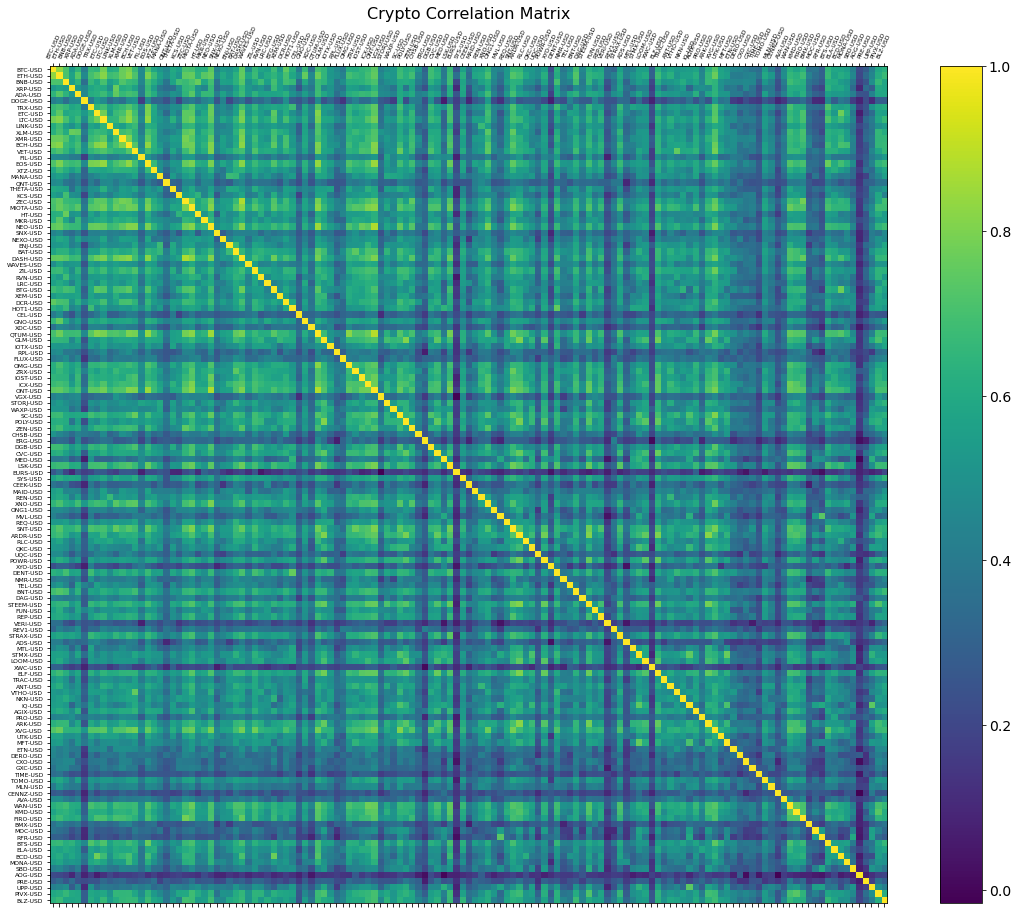

In [19]:
# plot correlation matrix
f = plt.figure(figsize=(19,15))
plt.matshow(r.corr(method='pearson'), fignum=f.number)
plt.xticks(range(r.select_dtypes(['number']).shape[1]), r.select_dtypes(['number']).columns, fontsize=6, rotation=65)
plt.yticks(range(r.select_dtypes(['number']).shape[1]), r.select_dtypes(['number']).columns, fontsize=6)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Crypto Correlation Matrix', fontsize=16);

In [38]:
eigs = np.sort(np.linalg.eigvalsh(rcorr.values))
eigs

array([9.31428442e-03, 1.26346822e-02, 1.61201114e-02, 1.77717802e-02,
       1.96414959e-02, 2.11277383e-02, 2.32988278e-02, 2.39929822e-02,
       2.77090884e-02, 2.91017542e-02, 3.12863381e-02, 3.46303171e-02,
       3.79970745e-02, 4.01413538e-02, 4.14146944e-02, 4.37314253e-02,
       4.79319543e-02, 4.94623987e-02, 5.11684159e-02, 5.28247298e-02,
       5.40863770e-02, 5.92543151e-02, 6.16451140e-02, 6.79111799e-02,
       7.12077086e-02, 7.31362385e-02, 7.70939184e-02, 7.80773864e-02,
       8.42518777e-02, 8.64298051e-02, 8.91592030e-02, 9.12375800e-02,
       9.61002089e-02, 1.01541027e-01, 1.04118156e-01, 1.07819460e-01,
       1.12472914e-01, 1.16868232e-01, 1.21644771e-01, 1.28099032e-01,
       1.30939682e-01, 1.37816103e-01, 1.39257226e-01, 1.42029776e-01,
       1.46198539e-01, 1.52286000e-01, 1.57611693e-01, 1.68913347e-01,
       1.69883849e-01, 1.77941258e-01, 1.81393003e-01, 1.91579737e-01,
       1.92957050e-01, 1.96043518e-01, 2.02490376e-01, 2.07507433e-01,
      

In [39]:
len(eigs)

133

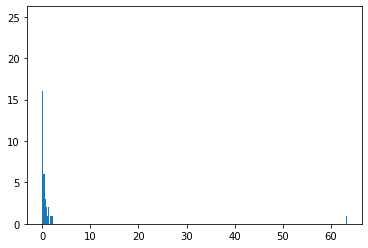

In [44]:
plt.hist(eigs, bins = 1000)
plt.show()